# Levantamento de Dados Agrícolas no Brasil

In [3]:
import pandas as pd

import matplotlib.pyplot as plt

📌**Segundo o artigo:**  

<p>Normalization: Each attribute was
normalized to a range of 0–1 using the MinMaxScaler method from
scikit-learn. Normalization is a crucial step in preprocessing as it ensures
that all attributes have similar weights in the machine learning models,
preventing attributes with larger ranges from dominating the analysis.
By scaling all variables to the same range, we ensure that the model
treats each attribute equally, thus improving the overall performance
and interpretability of the results. The primary variable we aimed at
predicted was the deforestation rate (measured in km2).</p>

<p>Normalização: Cada atributo foi
normalizado para um intervalo de 0–1 usando o método MinMaxScaler de
scikit-aprender. A normalização é uma etapa crucial no pré-processamento, pois garante
que todos os atributos têm pesos semelhantes nos modelos de aprendizado de máquina,
evitando que atributos com intervalos maiores dominem a análise.
Ao dimensionar todas as variáveis ​​para o mesmo intervalo, garantimos que o modelo
trata cada atributo igualmente, melhorando assim o desempenho geral
e interpretabilidade dos resultados. A principal variável que almejamos
previsto foi a taxa de desmatamento (medida em km2).</p>

## 1. População 👥

## 2. Produção de Milho 🌽

### Carregamento do Dataset 📌 🌽

In [27]:
df_milho = pd.read_excel("Producao-Milhos/Produção - milho(R$).xls")
df_milho.head(5)

,Sigla,Codigo,Estado,1999,2000,2001,2002,2003,2004,2005,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,AC,12,Acre,18904.944259,24988.623815,20954.800824,29299.779272,35786.634134,26947.290855,27006.472107,...,38268.591893,47024.320828,52944.780696,44083.775580,39699.818002,36829.169319,37864.276573,33140.497163,30894.373353,3.755522e+04
1,AL,27,Alagoas,10014.796780,17410.158922,13512.363104,36330.738430,7552.957958,16491.655465,17100.023457,...,15097.131217,776.582942,3381.146776,4173.057538,7536.855013,8125.826024,11220.132765,9889.093433,17008.340016,3.381848e+04
2,AM,13,Amazonas,12572.435225,12887.722412,9962.186814,10032.557501,12040.440695,11903.600267,18459.337233,...,20775.750071,21562.150384,17517.522557,16321.914633,12750.932234,6198.567107,5769.165124,3934.672753,3177.369852,3.391611e+03
3,AP,16,Amapá,663.587846,679.718502,1040.856621,1229.135524,602.771336,647.489097,903.332329,...,1487.279300,1152.900667,791.586128,750.958560,680.991540,590.611603,594.784525,426.905259,459.047068,5.124092e+02
4,BA,29,Bahia,375105.438329,501726.823716,399834.954285,638859.811464,708056.506271,711164.008933,583660.566800,...,745510.058300,719756.399612,701582.387122,831413.663386,793235.816620,702204.208474,526824.273705,672710.163159,586494.715801,1.130002e+06


### Vizualizar potências tratamentos no Dataset 📌 🌽

In [28]:
df_milho.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sigla   27 non-null     object 
 1   Codigo  27 non-null     int64  
 2   Estado  27 non-null     object 
 3   1999    27 non-null     float64
 4   2000    27 non-null     float64
 5   2001    27 non-null     float64
 6   2002    27 non-null     float64
 7   2003    27 non-null     float64
 8   2004    27 non-null     float64
 9   2005    27 non-null     float64
 10  2006    27 non-null     float64
 11  2007    27 non-null     float64
 12  2008    27 non-null     float64
 13  2009    27 non-null     float64
 14  2010    27 non-null     float64
 15  2011    27 non-null     float64
 16  2012    27 non-null     float64
 17  2013    27 non-null     float64
 18  2014    27 non-null     float64
 19  2015    27 non-null     float64
 20  2016    27 non-null     float64
 21  2017    27 non-null     float64
 22  2018

In [29]:
print(df_milho.dtypes)  # Verificar os tipos das colunas

Sigla      object
Codigo      int64
Estado     object
1999      float64
2000      float64
2001      float64
2002      float64
2003      float64
2004      float64
2005      float64
2006      float64
2007      float64
2008      float64
2009      float64
2010      float64
2011      float64
2012      float64
2013      float64
2014      float64
2015      float64
2016      float64
2017      float64
2018      float64
2019      float64
2020      float64
dtype: object


### Filtragem dos estados📌 🌽

In [30]:
# Lista dos estados que queremos manter
estados_desejados = [
    "Acre", "Roraima", "Rondônia", "Amazonas", "Amapá",
    "Mato Grosso", "Pará", "Tocantins", "Maranhão"
]

# Filtrar apenas os estados desejados
df_milho_estado_filtrado = df_milho[df_milho["Estado"].isin(estados_desejados)].copy()
df_milho_estado_filtrado = df_milho_estado_filtrado.set_index("Estado")  # Definir índice como nome do estado


In [31]:
df_milho_filtrado = df_milho_estado_filtrado.reset_index()
print(df_milho_filtrado["Estado"].head(len(estados_desejados)))

0           Acre
1       Amazonas
2          Amapá
3       Maranhão
4    Mato Grosso
5           Pará
6       Rondônia
7        Roraima
8      Tocantins
Name: Estado, dtype: object


### Preparação dos dados para o gráfico 📌 🌽

In [32]:
# Selecionar as colunas dos anos
# 0(Sigla) 1(Código) 2(Estado) 3(1999)
colunas_anos_milho = df_milho_filtrado.columns[4:] 
print(colunas_anos_milho)


Index(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020'],
      dtype='object')


In [33]:
# Armazenar as Siglas e os Estados em variáveis separadas
siglas_milho = df_milho_filtrado["Sigla"]
estados_milho = df_milho_filtrado["Estado"]
# Exibir Siglas e Estados lado a lado com tabulação
for sigla, estado in zip(siglas_milho, estados_milho):
    print(sigla, "\t", estado)


AC 	 Acre
AM 	 Amazonas
AP 	 Amapá
MA 	 Maranhão
MT 	 Mato Grosso
PA 	 Pará
RO 	 Rondônia
RR 	 Roraima
TO 	 Tocantins


### Processo de Plotação do Gráfico 📌 🌽

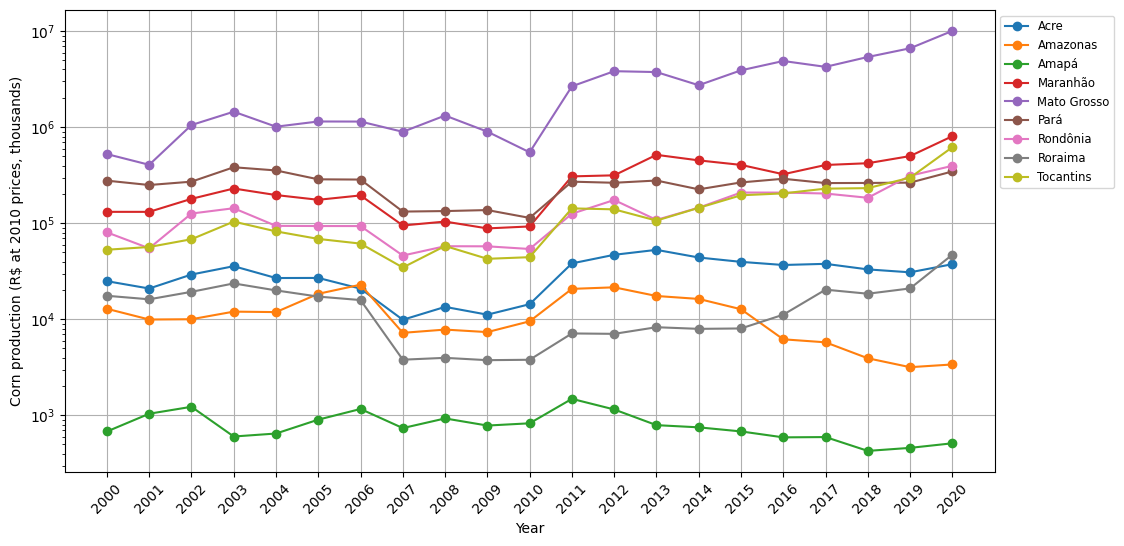

In [34]:

plt.figure(figsize=(12, 6))

# Iterar sobre os estados e siglas para plotar os dados corretamente
for sigla, estado in zip(siglas_milho, estados_milho):
    plt.plot(colunas_anos_milho, df_milho_filtrado[df_milho_filtrado["Sigla"] == sigla].iloc[:, 4:].values.flatten(), 
             marker='o', label=estado)

plt.xlabel("Year")
plt.ylabel("Corn production (R$ at 2010 prices, thousands)")
plt.xticks(colunas_anos_milho, rotation=45)
plt.yscale("log")  # Escala logarítmica
plt.legend(loc="upper left", bbox_to_anchor=(1,1), fontsize="small")
plt.grid(True)

plt.show()


## 3. Área plantada ou colhida (hectares) 🌱

➡️**Resumo:** 

<p>Área plantada: A extensão total das terras onde foram feitas plantações em um determinado período.</p>
<p>Área colhida: A extensão total das terras onde as colheitas foram efetivamente realizadas (pode ser menor que a área plantada devido a perdas).</p>


➡️**Segundo o artigo:**  

<p> A área plantada ou colhida foi identificada como uma das variáveis mais importantes para prever o desmatamento, especialmente em modelos baseados em árvores de decisão, como Random Forest, Gradient Boosting, Decision Tree e Extra Trees.</p>

<p>A análise de importância das variáveis (feature importance) mostrou que a área de cultivos permanentes e a área de cultivos temporários estão entre os principais fatores que influenciam o desmatamento.</p>

<p></p>


### Carregamento do Dataset 📌🌱

In [142]:
df_area_plantada_colhida = pd.read_excel("Área Plantada ou Colhida (hectares)/Área plantada ou destinada à colheita - total.xls")
df_milho.head(11)

,Sigla,Codigo,Estado,1999,2000,2001,2002,2003,2004,2005,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,AC,12,Acre,91787,105167,102604,113139,113362,132684,134582,...,132201,146928,130776,123511,116587,107294,100543,85330,81903,81550
1,AL,27,Alagoas,703112,713725,707909,685171,594087,652276,651244,...,599116,527082,578948,567446,461581,455548,521140,449703,490459,467252
2,AM,13,Amazonas,213964,209183,197059,203935,194653,181457,210503,...,188120,188131,176155,137654,124636,123625,131242,123073,123121,123071
3,AP,16,Amapá,8235,10025,14856,14407,13687,14667,16635,...,25564,24688,28120,43172,34499,37651,42260,36828,37334,38679
4,BA,29,Bahia,3920625,4175399,4059643,4316615,4392635,4671230,4833599,...,4904232,4397344,4515117,4902220,5032413,4574500,4075524,4127884,4122259,4136484
5,CE,23,Ceará,1836602,1930621,1805994,1958333,1965360,1895118,1744157,...,2084945,1732234,1364914,1505816,1508414,1438053,1521932,1471602,1372558,1385916
6,DF,53,Distrito Federal,80475,84690,85252,89818,101584,113182,125313,...,127644,134905,136665,175023,161011,166489,162894,165073,165445,171565
7,ES,32,Espírito Santo,742936,746387,759385,784580,799522,795406,789128,...,694209,687664,675834,658030,652000,616289,584314,567298,558348,565084
8,GO,52,Goiás,3059313,3092529,3152788,3500954,3749736,4307207,4325931,...,4926515,5282270,5635281,6135462,6125209,6345627,6436529,6351417,6676276,6941305
9,MA,21,Maranhão,1180275,1244774,1286775,1327467,1445559,1553114,1640447,...,1788327,1830190,1878533,2006386,1829731,1597851,1810133,1821742,1722710,1719056


### Vizualizar potências tratamentos no Dataset 📌🌱

In [165]:
df_area_plantada_colhida.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Sigla   27 non-null     object
 1   Codigo  27 non-null     int64 
 2   Estado  27 non-null     object
 3   1999    27 non-null     int64 
 4   2000    27 non-null     int64 
 5   2001    27 non-null     int64 
 6   2002    27 non-null     int64 
 7   2003    27 non-null     int64 
 8   2004    27 non-null     int64 
 9   2005    27 non-null     int64 
 10  2006    27 non-null     int64 
 11  2007    27 non-null     int64 
 12  2008    27 non-null     int64 
 13  2009    27 non-null     int64 
 14  2010    27 non-null     int64 
 15  2011    27 non-null     int64 
 16  2012    27 non-null     int64 
 17  2013    27 non-null     int64 
 18  2014    27 non-null     int64 
 19  2015    27 non-null     int64 
 20  2016    27 non-null     int64 
 21  2017    27 non-null     int64 
 22  2018    27 non-null     int6

In [176]:
print(df_area_plantada_colhida.dtypes)  # Verificar os tipos das colunas

Sigla     object
Codigo     int64
Estado    object
1999       int64
2000       int64
2001       int64
2002       int64
2003       int64
2004       int64
2005       int64
2006       int64
2007       int64
2008       int64
2009       int64
2010       int64
2011       int64
2012       int64
2013       int64
2014       int64
2015       int64
2016       int64
2017       int64
2018       int64
2019       int64
2020       int64
dtype: object


### Filtragem dos estados📌🌱

In [167]:
# Lista dos estados que queremos manter
estados_desejados = [
    "Acre", "Roraima", "Rondônia", "Amazonas", "Amapá",
    "Mato Grosso", "Pará", "Tocantins", "Maranhão"
]

# Filtrar apenas os estados desejados
df_area_plantada_colhida_estado_filtrado = df_area_plantada_colhida[df_area_plantada_colhida["Estado"].isin(estados_desejados)].copy()
df_area_plantada_colhida_estado_filtrado = df_area_plantada_colhida_estado_filtrado.set_index("Estado")  # Definir índice como nome do estado

In [172]:
df_area_plantada_colhida_filtrado = df_area_plantada_colhida_estado_filtrado.reset_index()
print(df_area_plantada_colhida_filtrado["Estado"].head(len(estados_desejados)))

0           Acre
1       Amazonas
2          Amapá
3       Maranhão
4    Mato Grosso
5           Pará
6       Rondônia
7        Roraima
8      Tocantins
Name: Estado, dtype: object


### Preparação dos dados para o gráfico 📌🌱

In [178]:
# Selecionar as colunas dos anos
# 0(Sigla) 1(Código) 2(Estado) 3(1999)
colunas_anos_area_plantada_colhida = df_area_plantada_colhida_filtrado.columns[4:] 
print(colunas_anos_area_plantada_colhida)


Index(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020'],
      dtype='object')


In [174]:
# Armazenar as Siglas e os Estados em variáveis separadas
siglas_area_planta_colhida = df_area_plantada_colhida_filtrado["Sigla"]
estados_area_planta_colhida = df_area_plantada_colhida_filtrado["Estado"]
# Exibir Siglas e Estados lado a lado com tabulação
for sigla, estado in zip(siglas_area_planta_colhida,estados_area_planta_colhida):
    print(sigla, "\t", estado)

AC 	 Acre
AM 	 Amazonas
AP 	 Amapá
MA 	 Maranhão
MT 	 Mato Grosso
PA 	 Pará
RO 	 Rondônia
RR 	 Roraima
TO 	 Tocantins


### Processo de Plotação do Gráfico 📌🌱

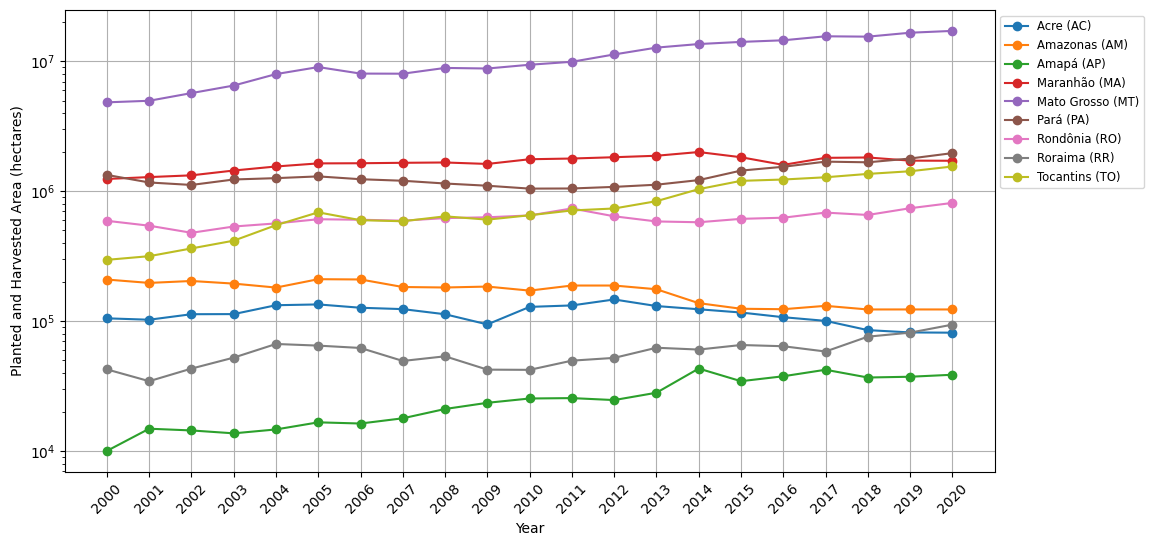

In [181]:
plt.figure(figsize=(12, 6))

# Iterar sobre os estados e siglas para plotar os dados corretamente
for sigla, estado in zip(siglas_area_planta_colhida, estados_area_planta_colhida):
    dados_estado = df_area_plantada_colhida_filtrado[df_area_plantada_colhida_filtrado["Sigla"] == sigla]
    
    if not dados_estado.empty:
        plt.plot(colunas_anos_area_plantada_colhida, dados_estado.iloc[0, 4:].values.flatten(), 
                 marker='o', label=f"{estado} ({sigla})")  # Melhorando a legenda

plt.xlabel("Year")
plt.ylabel("Planted and Harvested Area (hectares)")  # Atualizado para o correto
plt.xticks(colunas_anos_area_plantada_colhida, rotation=45)
plt.yscale("log")  # Escala logarítmica
plt.legend(loc="upper left", bbox_to_anchor=(1, 1), fontsize="small")
plt.grid(True)

plt.show()



# 4. Despesa Orçamentária 💰

➡️**Segundo o artigo:**  

## **Trecho 1:**

### **Texto Original:**
<p>"The analysis revealed that the harvested area of permanent crops is the most influential variable in predicting deforestation, followed by the area of temporary crops. Furthermore, our findings indicate a significant inverse relationship between public spending and deforestation rates."</p>

### **Texto Traduzido:**
<p>"A análise revelou que a área colhida de culturas permanentes é a variável mais influente na previsão do desmatamento, seguida pela área de culturas temporárias. Além disso, nossos achados indicam uma relação inversa significativa entre os gastos públicos e as taxas de desmatamento."</p>


## **Trecho 2:**


### **Texto Original:**
<p>"The SHAP analysis reveals that budget expenditure consistently has a negative SHAP value, indicating its role in reducing deforestation rates. Higher public spending on environmental management, law enforcement, and sustainable agricultural practices can mitigate deforestation."</p>

### **Texto Traduzido:**
<p>"A análise SHAP revela que as despesas orçamentárias consistentemente têm um valor SHAP negativo, indicando seu papel na redução das taxas de desmatamento. Maiores gastos públicos em gestão ambiental, fiscalização e práticas agrícolas sustentáveis podem mitigar o desmatamento."</p>


## **Trecho 3:**


### **Texto Original:**
<p>"The SHAP values for budget expenditure are negative, indicating that higher public spending is associated with lower deforestation rates. This finding underscores the importance of financial investment in conservation efforts."</p>

### **Texto Traduzido:**
<p>"Os valores SHAP para as despesas orçamentárias são negativos, indicando que maiores gastos públicos estão associados a menores taxas de desmatamento. Essa descoberta ressalta a importância do investimento financeiro em esforços de conservação."</p>



## **Trecho 4:**

### **Texto Original:**
<p>"The SHAP analysis supports the findings from the feature importance analysis by providing a more detailed view of how each feature affects the predictions. The consistent patterns observed in SHAP values across different models reinforce the importance of the identified variables. For instance, the high SHAP values for permanent and temporary crops across all models confirm their critical role in driving deforestation. Similarly, the negative SHAP values for budget expenditure highlight the mitigating effect of financial investment on deforestation rates."</p>

### **Texto Traduzido:**
<p>"A análise SHAP apoia os achados da análise de importância das variáveis, fornecendo uma visão mais detalhada de como cada característica afeta as previsões. Os padrões consistentes observados nos valores SHAP em diferentes modelos reforçam a importância das variáveis identificadas. Por exemplo, os altos valores SHAP para culturas permanentes e temporárias em todos os modelos confirmam seu papel crítico no desmatamento. Da mesma forma, os valores SHAP negativos para as despesas orçamentárias destacam o efeito mitigador do investimento financeiro nas taxas de desmatamento."</p>


## **Trecho 5:**


### **Texto Original:**
<p>"The substantial role of permanent crop area in our machine learning models is noteworthy, especially against the backdrop of its decline in most states analyzed, compared to the increase in temporary farming areas. Rivero et al. (2009) observed that soybeans, a major temporary crop, often replace other crops or livestock areas. This transition to soybean cultivation, particularly in areas already deforested, explains why temporary crops like soybeans have a relatively smaller impact on further deforestation. Our models also indicated that fire outbreaks had a minimal effect on deforestation, consistent with Jakimow et al. (2023), who found most fires occur in areas already cleared. Additionally, GDP and population were not significant factors in deforestation."</p>

### **Texto Traduzido:**
<p>"O papel substancial da área de culturas permanentes em nossos modelos de aprendizado de máquina é notável, especialmente diante do declínio observado na maioria dos estados analisados, em comparação com o aumento nas áreas de culturas temporárias. Rivero et al. (2009) observaram que a soja, uma cultura temporária importante, frequentemente substitui outras culturas ou áreas de pecuária. Essa transição para o cultivo de soja, particularmente em áreas já desmatadas, explica por que culturas temporárias como a soja têm um impacto relativamente menor no desmatamento adicional. Nossos modelos também indicaram que os focos de incêndio tiveram um efeito mínimo no desmatamento, consistente com Jakimow et al. (2023), que descobriram que a maioria dos incêndios ocorre em áreas já desmatadas. Além disso, o PIB e a população não foram fatores significativos no desmatamento."</p>

## **Trecho 6:**


### **Texto Original:**
<p>"The SHAP analysis provides additional insights into the impact of various features on deforestation. The negative influence of budget expenditure on deforestation rates shows the importance of financial investment in conservation and sustainable practices. This finding is critical for policymakers, as it suggests that increasing public spending on environmental management can effectively reduce deforestation. Conversely, the positive impact of both temporary and permanent crops on deforestation highlights the ongoing pressure of agricultural expansion on forested areas."</p>

### **Texto Traduzido:**
<p>"A análise SHAP fornece insights adicionais sobre o impacto de várias características no desmatamento. A influência negativa das despesas orçamentárias nas taxas de desmatamento mostra a importância do investimento financeiro em conservação e práticas sustentáveis. Essa descoberta é crucial para os formuladores de políticas, pois sugere que o aumento dos gastos públicos em gestão ambiental pode reduzir efetivamente o desmatamento. Por outro lado, o impacto positivo de culturas temporárias e permanentes no desmatamento destaca a pressão contínua da expansão agrícola sobre áreas florestadas."</p>




### Carregamento do Dataset 📌💰

In [ ]:
#Obs: não é o mesmo dado do lab
df_despesas = pd.read_excel("Despesa Orçamentária (R$)/Despesa por função - gestão ambiental, agricultura e organização agrária - empenhada - estadual.xls")
df_despesas.head(5)

,Sigla,Codigo,Estado,1999,2000,2001,2002,2003,2004,2005,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,AC,12,Acre,1.648035e+07,2.883258e+07,2.341070e+07,4.105204e+07,3.807467e+07,4.485788e+07,5.208983e+07,...,1.327949e+08,1.888470e+08,1.684722e+08,1.827975e+08,1.655324e+08,1.560863e+08,1.645238e+08,1.697231e+08,1.335434e+08,1.553372e+08
1,AL,27,Alagoas,1.806905e+07,1.921092e+07,2.271804e+07,9.689207e+07,5.027892e+07,4.136179e+07,5.471594e+07,...,8.321811e+07,1.047100e+08,1.510090e+08,1.542988e+08,1.426337e+08,3.025895e+08,2.941206e+08,3.245115e+08,1.999142e+08,2.168730e+08
2,AM,13,Amazonas,1.768597e+07,0.000000e+00,7.891870e+06,4.453358e+07,5.579549e+07,8.833143e+07,1.130113e+08,...,1.673709e+08,2.319340e+08,2.947667e+08,3.239618e+08,1.861335e+08,2.129446e+08,1.956323e+08,2.877255e+08,1.941365e+08,1.750441e+08
3,AP,16,Amapá,2.869222e+06,5.433628e+06,9.538735e+06,1.332816e+07,1.462761e+07,1.524754e+07,1.812019e+07,...,2.434730e+07,2.771443e+07,4.638822e+07,3.698461e+07,2.632406e+07,1.512032e+07,1.808358e+07,2.133502e+07,1.206510e+07,1.410630e+07
4,BA,29,Bahia,1.418427e+08,2.046999e+08,1.976951e+08,2.739799e+08,3.525604e+08,4.334416e+08,4.105308e+08,...,6.051689e+08,6.882287e+08,6.876168e+08,7.325790e+08,5.410978e+08,6.310006e+08,6.554564e+08,7.857675e+08,6.650887e+08,7.342562e+08


### Vizualizar potências tratamentos no Dataset 📌💰

In [17]:
df_despesas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sigla   27 non-null     object 
 1   Codigo  27 non-null     int64  
 2   Estado  27 non-null     object 
 3   1999    27 non-null     float64
 4   2000    27 non-null     float64
 5   2001    27 non-null     float64
 6   2002    27 non-null     float64
 7   2003    27 non-null     float64
 8   2004    27 non-null     float64
 9   2005    27 non-null     float64
 10  2006    27 non-null     float64
 11  2007    27 non-null     float64
 12  2008    27 non-null     float64
 13  2009    27 non-null     float64
 14  2010    27 non-null     float64
 15  2011    27 non-null     float64
 16  2012    27 non-null     float64
 17  2013    27 non-null     float64
 18  2014    27 non-null     float64
 19  2015    27 non-null     float64
 20  2016    27 non-null     float64
 21  2017    27 non-null     float64
 22  2018

In [18]:
print(df_despesas.dtypes)  # Verificar os tipos das colunas

Sigla      object
Codigo      int64
Estado     object
1999      float64
2000      float64
2001      float64
2002      float64
2003      float64
2004      float64
2005      float64
2006      float64
2007      float64
2008      float64
2009      float64
2010      float64
2011      float64
2012      float64
2013      float64
2014      float64
2015      float64
2016      float64
2017      float64
2018      float64
2019      float64
2020      float64
dtype: object


### Filtragem dos estados📌💰

In [19]:
# Lista dos estados que queremos manter
estados_desejados = [
    "Acre", "Roraima", "Rondônia", "Amazonas", "Amapá",
    "Mato Grosso", "Pará", "Tocantins", "Maranhão"
]

# Filtrar apenas os estados desejados
df_despesas_estado_filtrado = df_despesas[df_despesas["Estado"].isin(estados_desejados)].copy()
df_despesas_estado_filtrado = df_despesas_estado_filtrado.set_index("Estado")  # Definir índice como nome do estado

# Visualizar os primeiros dados filtrados
print(df_despesas_estado_filtrado.head())


            Sigla  Codigo         1999         2000         2001         2002  \
Estado                                                                          
Acre           AC      12  16480351.00  28832578.47  23410698.78  41052040.32   
Amazonas       AM      13  17685970.41         0.00   7891870.00  44533581.11   
Amapá          AP      16   2869221.75   5433627.80   9538735.27  13328156.60   
Maranhão       MA      21  15239850.98   7073867.98   4960227.22  29199437.98   
Mato Grosso    MT      51  43232165.00  52652879.67  40140417.28  89468498.00   

                    2003         2004          2005          2006  ...  \
Estado                                                             ...   
Acre         38074672.00  44857879.48  5.208983e+07  6.572244e+07  ...   
Amazonas     55795494.58  88331432.65  1.130113e+08  1.092601e+08  ...   
Amapá        14627607.31  15247535.25  1.812019e+07  2.084534e+07  ...   
Maranhão     37711437.24  22579248.80  2.898953e+07  5.055015e

In [20]:
df_despesas_filtrado = df_despesas_estado_filtrado.reset_index()
print(df_despesas_filtrado["Estado"].head(len(estados_desejados)))


0           Acre
1       Amazonas
2          Amapá
3       Maranhão
4    Mato Grosso
5           Pará
6       Rondônia
7        Roraima
8      Tocantins
Name: Estado, dtype: object



### Preparação dos dados para o gráfico 📌 💰


In [21]:
# Selecionar as colunas dos anos
# 0(Sigla) 1(Código) 2(Estado) 3(1999)
colunas_anos_despesas = df_despesas_filtrado.columns[4:] 
print(colunas_anos_despesas)

Index(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020'],
      dtype='object')


In [25]:

# Armazenar as Siglas e os Estados em variáveis separadas
siglas_despesas = df_despesas_filtrado["Sigla"]
estados_despesas = df_despesas_filtrado["Estado"]
# Exibir Siglas e Estados lado a lado com tabulação
for sigla, estado in zip(siglas_despesas, estados_despesas):
    print(sigla, "\t", estado)


AC 	 Acre
AM 	 Amazonas
AP 	 Amapá
MA 	 Maranhão
MT 	 Mato Grosso
PA 	 Pará
RO 	 Rondônia
RR 	 Roraima
TO 	 Tocantins


### Processo de Plotação do Gráfico 📌 💰

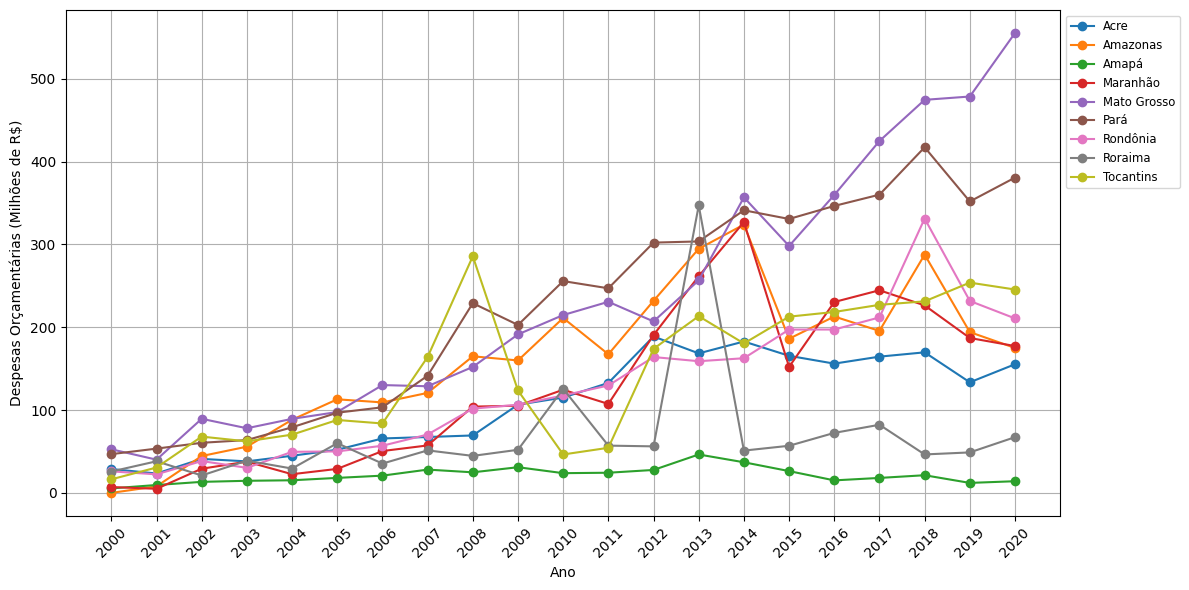

In [24]:
import matplotlib.pyplot as plt

# Configuração do tamanho da figura
plt.figure(figsize=(12, 6))

# Iterar sobre os estados e siglas para plotar os dados corretamente
for sigla, estado in zip(siglas_despesas, estados_despesas):
    # Extrair os valores das despesas orçamentárias (em milhões de R$)
    despesas = df_despesas_filtrado[df_despesas_filtrado["Sigla"] == sigla].iloc[:, 4:].values.flatten() / 1_000_000  # Convertendo para milhões de R$
    plt.plot(colunas_anos_despesas, despesas, marker='o', label=estado)

# Configurações do gráfico
plt.xlabel("Ano")
plt.ylabel("Despesas Orçamentárias (Milhões de R$)")
plt.xticks(colunas_anos_despesas, rotation=45)  # Rotacionar os rótulos do eixo X para melhor visualização
plt.yscale("linear")  # Escala linear (não logarítmica, pois estamos trabalhando com valores monetários)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1), fontsize="small")  # Legenda fora do gráfico
plt.grid(True)  # Adicionar grade ao gráfico

# Exibir o gráfico
plt.tight_layout()  # Ajustar layout para evitar cortes
plt.show()